In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

# rcParams['figure.figsize'] = 20, 8

In [1]:
import torch
from torch.autograd import Variable
a = Variable(torch.FloatTensor([[2, 4]]), requires_grad=True)  # 构建一个 1 x 2 的矩阵
b = torch.zeros(1, 2)  # 构建一个相同大小的 0 矩阵
b[0, 0] = a[0, 0]**2 + a[0, 1]
b[0, 1] = a[0, 1]**3 + 2 * a[0, 0]
out = 2 * b
out.backward(torch.FloatTensor([[0, 1]]), retain_graph=True)
print(a.grad)
out.backward(torch.FloatTensor([[1, 0]]), retain_graph=True)
print(a.grad)
out.backward(torch.FloatTensor([[1, 1]]), retain_graph=True)
print(a.grad)

tensor([[ 4., 96.]])
tensor([[12., 98.]])
tensor([[ 24., 196.]])


In [2]:
a = Variable(torch.FloatTensor([[1, 2], [5, 8]]), requires_grad=True)
w = Variable(torch.ones(2, 1), requires_grad=True)
out = torch.mm(a, w)
print(out)
out.backward(torch.FloatTensor([[1], [1]]))
print(w.grad.data)

tensor([[ 3.],
        [13.]], grad_fn=<MmBackward>)
tensor([[ 6.],
        [10.]])


In [3]:
x = Variable(torch.FloatTensor([2, 3]), requires_grad=True)
k = Variable(torch.zeros(2))

k[0] = x[0]**2 + 3 * x[1]
k[1] = x[1]**2 + 2 * x[0]
j = torch.zeros(2, 2)

k.backward(torch.FloatTensor([1, 0]), retain_graph=True)
j[0] = x.grad.data
print(j[0])

x.grad.data.zero_()  # 归零之前求得的梯度

k.backward(torch.FloatTensor([0, 1]), retain_graph=True)
j[1] = x.grad.data
print(j[1])

x.grad.data.zero_()  # 归零之前求得的梯度

k.backward(torch.FloatTensor([1, 1]))
print(x.grad.data)

tensor([4., 3.])
tensor([2., 6.])
tensor([6., 9.])


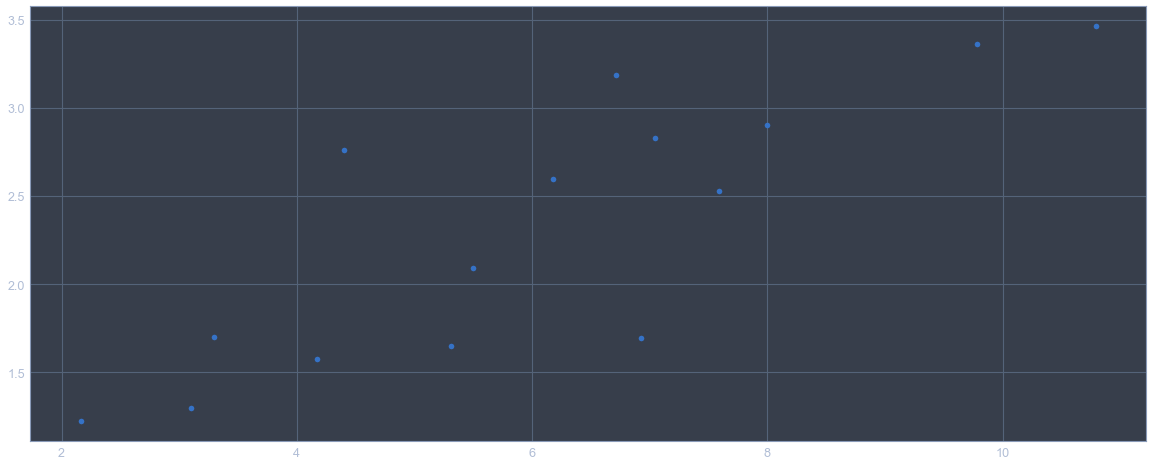

In [24]:
torch.manual_seed(2017)
import numpy as np
x_train = np.array(
    [[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59],
     [2.167], [7.042], [10.791], [5.313], [7.997], [3.1]],
    dtype=np.float32)
y_train = np.array(
    [[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53],
     [1.221], [2.827], [3.465], [1.65], [2.904], [1.3]],
    dtype=np.float32)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.plot(x_train, y_train, 'bo')

### 一次函数回归

w =  -1.3718336820602417
b =  0.0
loss =  tensor(128.2351, grad_fn=<MeanBackward0>)
w grad =  tensor([-147.2072])
b grad =  tensor([-21.2880])

epoch: 0, loss: 2.5713448524475098
w_ =  0.30033767223358154
b_ =  0.24295279383659363

epoch: 1, loss: 0.24555562436580658
w_ =  0.32739970088005066
b_ =  0.2481531798839569

epoch: 2, loss: 0.20234784483909607
w_ =  0.3309221565723419
b_ =  0.24996714293956757

epoch: 3, loss: 0.20138393342494965
w_ =  0.33124276995658875
b_ =  0.2513175904750824

epoch: 4, loss: 0.20120269060134888
w_ =  0.33112815022468567
b_ =  0.25260213017463684

epoch: 5, loss: 0.20103687047958374
w_ =  0.33095476031303406
b_ =  0.25387489795684814

epoch: 6, loss: 0.20087209343910217
w_ =  0.3307737708091736
b_ =  0.2551432251930237

epoch: 7, loss: 0.20070809125900269
w_ =  0.33059215545654297
b_ =  0.256408154964447

epoch: 8, loss: 0.2005450427532196
w_ =  0.3304108679294586
b_ =  0.2576698064804077

epoch: 9, loss: 0.2003827840089798
w_ =  0.3302299976348877
b_ =  

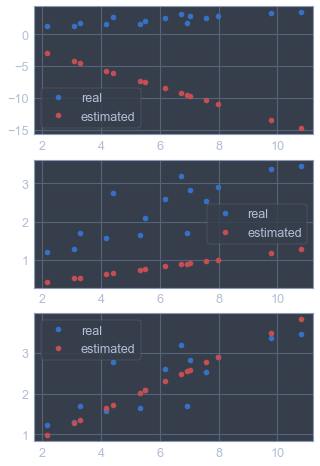

In [29]:
import torch
from torch.autograd import Variable

x_train = np.array(
    [[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59],
     [2.167], [7.042], [10.791], [5.313], [7.997], [3.1]],
    dtype=np.float32)
y_train = np.array(
    [[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53],
     [1.221], [2.827], [3.465], [1.65], [2.904], [1.3]],
    dtype=np.float32)

rcParams['figure.figsize'] = 5, 8

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

w = Variable(torch.randn(1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

x_train = Variable(x_train)
y_train = Variable(y_train)


def linear_model(x):
    return x * w + b


print('w = ', w.item())
print('b = ', b.item())

y_ = linear_model(x_train)

plt.subplot(311)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()


def get_loss(y_, y):
    return torch.mean((y_ - y_train)**2)


loss = get_loss(y_, y_train)
print('loss = ', loss)

loss.backward()
print('w grad = ', w.grad)
print('b grad = ', b.grad)

# 更新一次
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

y_ = linear_model(x_train)
plt.subplot(312)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

print()
# 十次更新
for i in range(10):
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    w.grad.zero_()
    b.grad.zero_()
    loss.backward()

    w.data = w.data - 1e-2 * w.grad.data
    b.data = b.data - 1e-2 * b.grad.data
    print('epoch: {}, loss: {}'.format(i, loss.data))
    print('w_ = ', w.item())
    print('b_ = ', b.item())
    print()

plt.subplot(313)
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()







### 下面是多项式回归

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


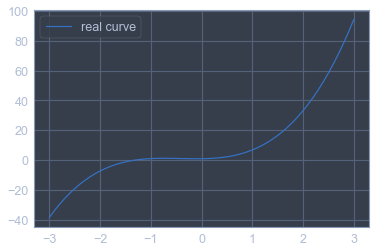

In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
%matplotlib inline
w_target = np.array([0.5, 3, 2.4])
b_target = np.array([0.9])
f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2])  # 打印出函数的式子
print(f_des)

x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[
    1] * x_sample**2 + w_target[2] * x_sample**3
plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

original
w:  tensor([[-1.5434],
        [-0.8328],
        [ 0.3055]])
b:  0.0
--------------------------------------------------


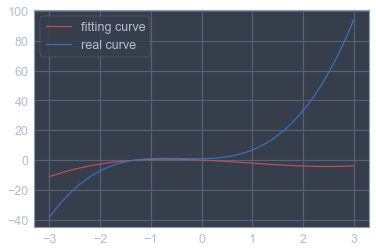

In [40]:
# 构建数据 x 和 y
# x 是一个如下矩阵 [x, x^2, x^3]
# y 是函数的结果 [y]

x_train = np.stack([x_sample**i for i in range(1, 4)],
                   axis=1)  # torch.Size([61, 3])

# 不用.float()就是float64数据了，numpy目的是精确
x_train = torch.from_numpy(x_train).float()
# y_train从61 变成61*1
y_train = torch.from_numpy(y_sample).float().unsqueeze(1)

# 定义参数和模型
w = Variable(torch.randn(3, 1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)
# 将 x 和 y 转换成 Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

print('original')
print('w: ', w.data)
print('b: ', b.data.item())
print('-' * 50)

def multi_linear(x):
    return torch.mm(x, w) + b


# 随机w b取值的
y_pred = multi_linear(x_train)
plt.plot(x_train.data.numpy()[:, 0],
         y_pred.data.numpy(),
         label='fitting curve',
         color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

tensor([-0.0975])
tensor([[-0.8426],
        [ 0.0179],
        [ 0.1275]])
epoch 20, Loss: 0.09167
epoch 40, Loss: 0.08820
epoch 60, Loss: 0.08485
epoch 80, Loss: 0.08163
epoch 100, Loss: 0.07853
--------------------------------------------------
end
w:  tensor([[0.1052],
        [3.0096],
        [2.4597]])
b:  0.8480242490768433
y = 0.85 + 0.11 * x + 3.01 * x^2 + 2.46 * x^3


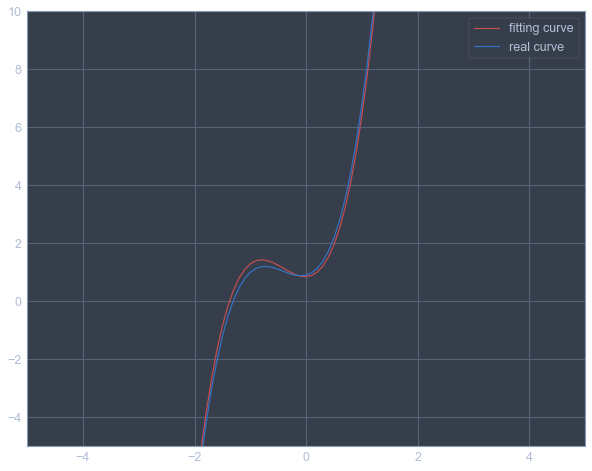

In [55]:

def get_loss(y_, y):
    return torch.mean((y_ - y_train)**2)


# 自动求导
loss = get_loss(y_pred, y_train)
loss.backward()
# 查看一下 w 和 b 的梯度
print(b.grad)
print(w.grad)

# 进行 100 次参数更新
for e in range(100):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred, y_train)

    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward(retain_graph=True)

    # 更新参数
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    if (e + 1) % 20 == 0:
        print('epoch {}, Loss: {:.5f}'.format(e + 1, loss.data.item()))
print('-' * 50)
print('end')
print('w: ', w.data)
print('b: ', b.data.item())


rcParams['figure.figsize'] = 10, 8

from matplotlib.pyplot import MultipleLocator
#把x轴的刻度间隔设置为1，并存在变量里
# y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为10，并存在变量里
ax=plt.gca()
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
plt.ylim(-5,10)
plt.xlim(-5,5)

# 模型优化结果
y_pred = multi_linear(x_train)
plt.plot(x_train.data.numpy()[:, 0],
         y_pred.data.numpy(),
         label='fitting curve',
         color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()


f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b.data.item(), w.data.numpy()[0, 0], w.data.numpy()[1, 0], w.data.numpy()[2, 0])  # 打印出函数的式子
print(f_des)